In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('./airfoil_self_noise.dat')
data

,800\t0\t0.3048\t71.3\t0.00266337\t126.201
0,1000\t0\t0.3048\t71.3\t0.00266337\t125.201
1,1250\t0\t0.3048\t71.3\t0.00266337\t125.951
2,1600\t0\t0.3048\t71.3\t0.00266337\t127.591
3,2000\t0\t0.3048\t71.3\t0.00266337\t127.461
4,2500\t0\t0.3048\t71.3\t0.00266337\t125.571
...,...
1497,2500\t15.6\t0.1016\t39.6\t0.0528487\t110.264
1498,3150\t15.6\t0.1016\t39.6\t0.0528487\t109.254
1499,4000\t15.6\t0.1016\t39.6\t0.0528487\t106.604
1500,5000\t15.6\t0.1016\t39.6\t0.0528487\t106.224


### use seperator to read data perfectly

In [5]:
data = pd.read_csv('./airfoil_self_noise.dat', sep='\t')
data.head()

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


### use index_col parameter 

In [6]:
data = pd.read_csv('./airfoil_self_noise.dat', sep='\t')
data.head()

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


### Change header column into values 0,1,2...

In [7]:
data = pd.read_csv('./airfoil_self_noise.dat', sep='\t', header=None)
data.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


**index_col** allow you to set which columns to be used as the index of the dataframe.
Above we use first column as index.

## Dataset Description

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.


**The only output is:**
6. Scaled sound pressure level, in decibels.

There are total of 6 columns where final column is the output feature and remaining ones are input features.

### set the column name to new name

In [8]:
columns = ['Frequency', 'Angle of Attack', 'Chord Length', 'Free-Stream Velocity', 'Suction Side', 'Pressure Level']

In [9]:
columns

['Frequency',
 'Angle of Attack',
 'Chord Length',
 'Free-Stream Velocity',
 'Suction Side',
 'Pressure Level']

In [10]:
data.columns = columns

In [11]:
data

,Frequency,Angle of Attack,Chord Length,Free-Stream Velocity,Suction Side,Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


## Do train and test split the dataset

In [12]:
X = data.iloc[:, :-1] #independent features
y = data.iloc[:, -1] # dependent feature

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.25)

2:03:06

In [15]:
X_train.head()

,Frequency,Angle of Attack,Chord Length,Free-Stream Velocity,Suction Side
1348,1600,6.7,0.1016,71.3,0.004783
811,1000,8.4,0.0508,55.5,0.005449
1232,1000,22.2,0.0254,39.6,0.022903
1483,2000,15.6,0.1016,71.3,0.043726
1400,1000,8.9,0.1016,39.6,0.012460


## plot the data 

In [16]:
import seaborn as sns

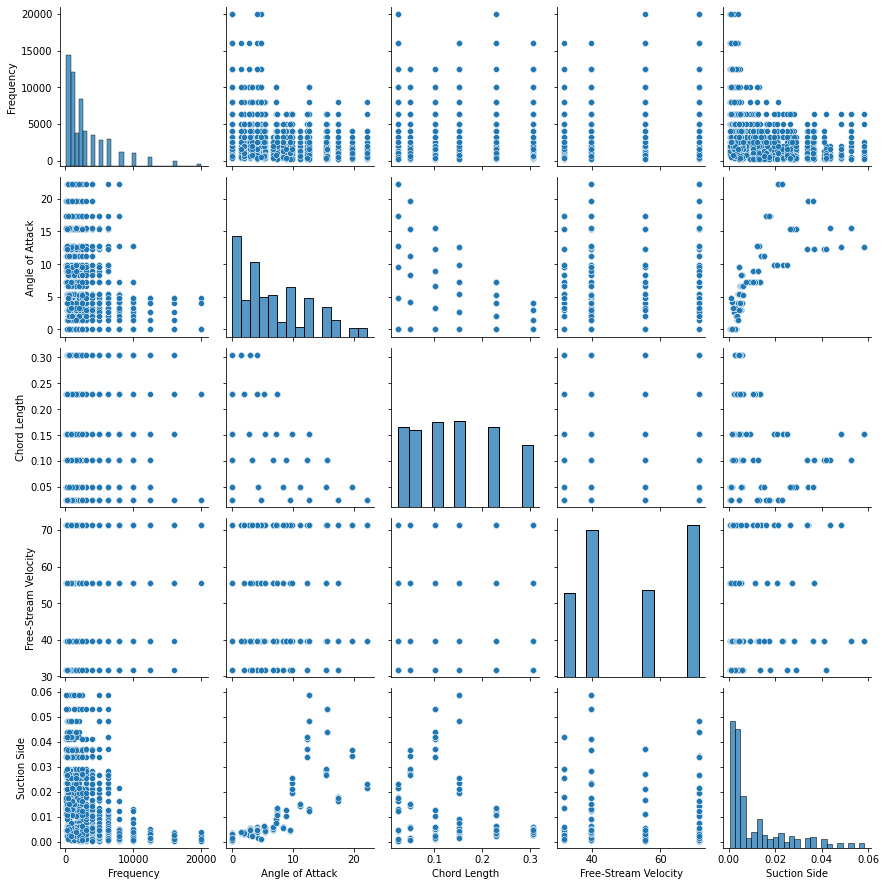

In [17]:
sns.pairplot(X_train)

## Create a confusion matrix

In [18]:
import matplotlib.pyplot as plt

In [19]:
X_train.corr()

,Frequency,Angle of Attack,Chord Length,Free-Stream Velocity,Suction Side
Frequency,1.000000,-0.283641,0.011013,0.129580,-0.240376
Angle of Attack,-0.283641,1.000000,-0.501791,0.044194,0.759708
Chord Length,0.011013,-0.501791,1.000000,0.013048,-0.223479
Free-Stream Velocity,0.129580,0.044194,0.013048,1.000000,-0.009186
Suction Side,-0.240376,0.759708,-0.223479,-0.009186,1.000000


### Inference:

Here **Angle of Attack** and **Suction Side** establishes a 75% correlation. In pairplot we can see the corresponding graph is linear.

### Check for outliers using boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


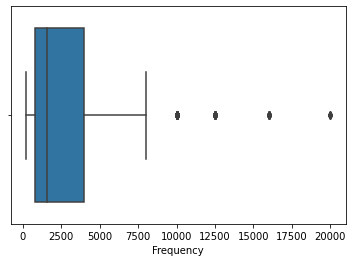

In [20]:
sns.boxplot(X_train['Frequency'])

**Inference:**

Outliers exist in frequency feature.

### Compare feature frequency with suction side feature using scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


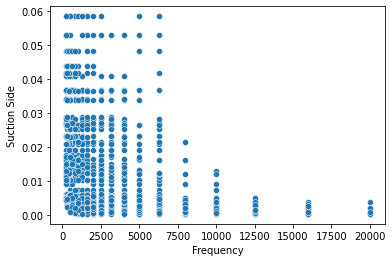

In [21]:
sns.scatterplot(X_train['Frequency'], X_train['Suction Side'])

## create linear regression model

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## dump the linear regressioin model into a file.

In [23]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb') )

## LOAD THE PICKLE FILE

In [26]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

# pass batch inputs to get batch outputs.
# X_test is a huge batch.
pickled_model.predict(X_test)

array([124.11588922, 119.63991003, 120.33067523, 129.68591477,
       129.80326283, 132.63878829, 122.49439295, 126.66491759,
       129.91880726, 125.99990307, 132.55999312, 113.84410935,
       130.02754528, 132.43856271, 123.61652707, 114.14909151,
       124.34267517, 126.69997137, 129.16414106, 131.76927594,
       125.81598872, 124.99128185, 116.51535361, 129.79967999,
       124.24456536, 124.72925651, 131.63500833, 124.59689074,
       115.80149273, 123.30869636, 125.16432954, 123.87211574,
       125.51151357, 118.6752952 , 121.63751204, 130.87634014,
       131.42652945, 128.21132585, 121.35109596, 118.0510627 ,
       126.33953809, 128.85534704, 126.36069824, 123.51125524,
       123.10798035, 130.1264249 , 125.08454987, 120.00023843,
       123.15443071, 132.75072148, 128.78359876, 117.74073346,
       123.4870277 , 122.61652734, 126.63827847, 120.51433063,
       123.35814675, 128.71001302, 124.3065509 , 123.16184345,
       125.36720061, 131.07434069, 126.78797134, 131.29

## Working with single input instead of batch inputs

We take the single input in the form of dictionary.

In [30]:
X_test.head(1)

,Frequency,Angle of Attack,Chord Length,Free-Stream Velocity,Suction Side
51,400,0.0,0.3048,31.7,0.003313


In [33]:
single_input = dict(X_test.iloc[0])
single_input

{'Angle of Attack': 0.0,
 'Chord Length': 0.3048,
 'Free-Stream Velocity': 31.7,
 'Frequency': 400.0,
 'Suction Side': 0.00331266}

In [34]:
# get the values from dictionary into a list.

In [42]:
values = []
for k, v in single_input.items():
  values.append(v)
print(values)

[400.0, 0.0, 0.3048, 31.7, 0.00331266]


In [43]:
# next pass this list of values into predict method.

In [44]:
pickled_model.predict(values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

**Inference:**

We got valueerror saying expecting 2d array. 
so we pass the list of values in 2d format.

In [48]:
# we pass the paramter 2d list.

In [45]:
pickled_model.predict([values])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([124.11588922])

In [47]:
output = pickled_model.predict([values])[0]
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


124.1158892200247

**Inference:**

we got the single output for the single input we provided.